Drawing bezier curves in pillow

https://stackoverflow.com/questions/246525/how-can-i-draw-a-bezier-curve-using-pythons-pil

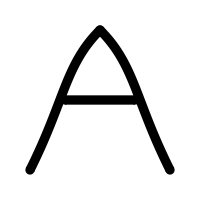

In [26]:
# imports
from PIL import Image
import aggdraw
import json

alphabets = json.load(open("./src/static/alphabets.json"))

A = alphabets["A"]

    # print(A[i])
# setup
canvas_edge = 200
img = Image.new("RGBA", (canvas_edge,canvas_edge), "#fff") # last part is image dimensions
draw = aggdraw.Draw(img)

char_edge = canvas_edge * 0.7

offset = (canvas_edge - char_edge) / 2

stroke_width = char_edge / 15
radius = stroke_width / 2

pen = aggdraw.Pen("black", stroke_width)
for i in range(len(A)):
    path = aggdraw.Path()
    vals = A[i]

    start_point = (vals["start"]["x"] * char_edge, vals["start"]["y"] * char_edge)
    
    control_point1 = (vals["control1"]["x"] * char_edge, vals["control1"]["y"] * char_edge)
    control_point2 = (vals["control2"]["x"] * char_edge, vals["control2"]["y"] * char_edge)
    end_point = (vals["end"]["x"] * char_edge, vals["end"]["y"] * char_edge)
    
    start_point = (start_point[0] + offset, start_point[1] + offset)
    control_point1 = (control_point1[0] + offset, control_point1[1] + offset)
    control_point2 = (control_point2[0] + offset, control_point2[1] + offset)
    end_point = (end_point[0] + offset, end_point[1] + offset)

    s_left = start_point[0] - radius
    s_top = start_point[1] - radius
    s_right = start_point[0] + radius
    s_bottom = start_point[1] + radius
    draw.ellipse((s_left, s_top, s_right, s_bottom), aggdraw.Pen(0, 0), aggdraw.Brush("black"))

    e_left = end_point[0] - radius
    e_top = end_point[1] - radius
    e_right = end_point[0] + radius
    e_bottom = end_point[1] + radius
    draw.ellipse((e_left, e_top, e_right, e_bottom), aggdraw.Pen(0, 0), aggdraw.Brush("black"))

    
    path.moveto(*start_point)
    path.curveto(*control_point1, *control_point2, *end_point)

    # draw the path
    # draw.parametric(path, pen)
    draw.path(path, pen)


# path.moveto(0,0)
# path.curveto(*control_point1, *control_point2, *end_point)
# path.close()


# img.save("testbeziercurves.png") # this image gets saved to same folder as the script
draw.flush()


In [48]:
import numpy as np

# params should be a list of numbers
# lets say we need a list of numbers that has a length a multiple of 4
def draw(params):
    canvas_edge = 200
    img = Image.new("RGBA", (canvas_edge,canvas_edge), "#fff") # last part is image dimensions
    draw = aggdraw.Draw(img)

    char_edge = canvas_edge * 0.7

    offset = (canvas_edge - char_edge) / 2

    stroke_width = char_edge / 15
    radius = stroke_width / 2

    pen = aggdraw.Pen("black", stroke_width)
    for i in range(len(params)):
        path = aggdraw.Path()
        vals = params[i]

        start_point = (vals["start"]["x"] * char_edge, vals["start"]["y"] * char_edge)
        
        control_point1 = (vals["control1"]["x"] * char_edge, vals["control1"]["y"] * char_edge)
        control_point2 = (vals["control2"]["x"] * char_edge, vals["control2"]["y"] * char_edge)
        end_point = (vals["end"]["x"] * char_edge, vals["end"]["y"] * char_edge)
        
        start_point = (start_point[0] + offset, start_point[1] + offset)
        control_point1 = (control_point1[0] + offset, control_point1[1] + offset)
        control_point2 = (control_point2[0] + offset, control_point2[1] + offset)
        end_point = (end_point[0] + offset, end_point[1] + offset)

        s_left = start_point[0] - radius
        s_top = start_point[1] - radius
        s_right = start_point[0] + radius
        s_bottom = start_point[1] + radius
        draw.ellipse((s_left, s_top, s_right, s_bottom), aggdraw.Pen(0, 0), aggdraw.Brush("black"))

        e_left = end_point[0] - radius
        e_top = end_point[1] - radius
        e_right = end_point[0] + radius
        e_bottom = end_point[1] + radius
        draw.ellipse((e_left, e_top, e_right, e_bottom), aggdraw.Pen(0, 0), aggdraw.Brush("black"))

        
        path.moveto(*start_point)
        path.curveto(*control_point1, *control_point2, *end_point)

        # draw the path
        # draw.parametric(path, pen)
        draw.path(path, pen)
    
    draw.flush()
    bw_array = np.array(img.convert('L'))
    return bw_array


# print(draw(A))


# Define the objective function to minimize the difference from the target "A"
# def objective(params):
#     generated_A = draw(params)
#     # target_A is the array image of font A
#     target_A = np.array(json_data['A'])
#     diff = np.sum((generated_A - target_A) ** 2)
#     return diff


[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 147   0   0   0   0   0   0   0   0   0   0 132 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 130   0   0   0   0   0   0   0   0   0   0 149
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255]


In [118]:
import numpy as np

# params should be a list of numbers
# lets say we need a list of numbers that has a length a multiple of 4
def draw_extended(params):
    canvas_edge = 200
    img = Image.new("RGBA", (canvas_edge,canvas_edge), "#fff") # last part is image dimensions
    draw = aggdraw.Draw(img)

    char_edge = canvas_edge * 0.7

    offset = (canvas_edge - char_edge) / 2

    stroke_width = char_edge / 15
    radius = stroke_width / 2

    pen = aggdraw.Pen("black", stroke_width)
    for i in range(int(len(params) / 8)):
        path = aggdraw.Path()

        start_point = (params[i * 8 + 0] * char_edge, params[i * 8 + 1] * char_edge)
        # (vals["start"]["x"] * char_edge, vals["start"]["y"] * char_edge)
        
        control_point1 = (params[i * 8 + 2] * char_edge, params[i * 8 + 3] * char_edge)
        control_point2 = (params[i * 8 + 4] * char_edge, params[i * 8 + 5] * char_edge)
        end_point = (params[i * 8 + 6] * char_edge, params[i * 8 + 7] * char_edge)
        
        start_point = (start_point[0] + offset, start_point[1] + offset)
        control_point1 = (control_point1[0] + offset, control_point1[1] + offset)
        control_point2 = (control_point2[0] + offset, control_point2[1] + offset)
        end_point = (end_point[0] + offset, end_point[1] + offset)

        s_left = start_point[0] - radius
        s_top = start_point[1] - radius
        s_right = start_point[0] + radius
        s_bottom = start_point[1] + radius
        draw.ellipse((s_left, s_top, s_right, s_bottom), aggdraw.Pen(0, 0), aggdraw.Brush("black"))

        e_left = end_point[0] - radius
        e_top = end_point[1] - radius
        e_right = end_point[0] + radius
        e_bottom = end_point[1] + radius
        draw.ellipse((e_left, e_top, e_right, e_bottom), aggdraw.Pen(0, 0), aggdraw.Brush("black"))

        
        path.moveto(*start_point)
        path.curveto(*control_point1, *control_point2, *end_point)

        # draw the path
        # draw.parametric(path, pen)
        draw.path(path, pen)
    
    draw.flush()
    bw_array = np.array(img.convert('L'))
    # make the range 0 to 1
    bw_array = bw_array / 255
    return bw_array




# Define the objective function to minimize the difference from the target "A"
# def objective(params):
#     generated_A = draw(params)
#     # target_A is the array image of font A
#     target_A = np.array(json_data['A'])
#     diff = np.sum((generated_A - target_A) ** 2)
#     return diff


In [119]:
from PIL import Image, ImageDraw, ImageFont


def create_image(size, bgColor, message, font, fontColor):
    W, H = size
    image = Image.new('RGB', size, bgColor)
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), message, font=font)
    draw.text(((W-w)/2, 0), message, font=font, fill=fontColor)
    return image

image_size = 200
font_size = int(image_size * 0.9)

myFont = ImageFont.truetype('./src/NanumPenScript-Regular.ttf', font_size)
myMessage = 'A'
myImage = create_image((image_size, image_size), 'white', myMessage, myFont, 'black')
# myImage.save('hello_world.png', "PNG")
myImage.show()

In [120]:
extended_A = []

for el in A:
    for key in el.keys():
        value = el[key]
        extended_A.append(value["x"])
        extended_A.append(value["y"])


In [121]:
draw_extended(extended_A)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

5682.03137254902
5682.5921568627455
5681.768627450981
5675.16862745098
5678.839215686275
5674.972549019608
5676.505882352942
5681.866666666667
5737.713725490195
5701.713725490195
5681.7411764705885
5702.866666666668
5678.81568627451
5702.6
5676.517647058824
5721.81568627451
5737.666666666668
5680.76862745098
5671.850980392157
5682.03137254902
5623.019607843137
5681.8549019607835
5610.4078431372545
5682.623529411765
5646.525490196078
5624.839215686275
5615.733333333333
5624.470588235294
5633.760784313726
5626.3725490196075
5643.490196078432
5625.913725490196
5651.584313725491
5628.635294117647
5623.709803921569
5618.84705882353
5612.533333333333
5605.96862745098
5562.964705882353
5595.0392156862745
5587.329411764706
5581.686274509804
5572.639215686275
5566.109803921569
5556.21568627451
5493.792156862745
5541.713725490196
5530.466666666666
5535.035294117647
5562.309803921569
5543.549019607844
5556.360784313726
5537.133333333333
5534.46274509804
5526.764705882353
5511.062745098039
5510.60

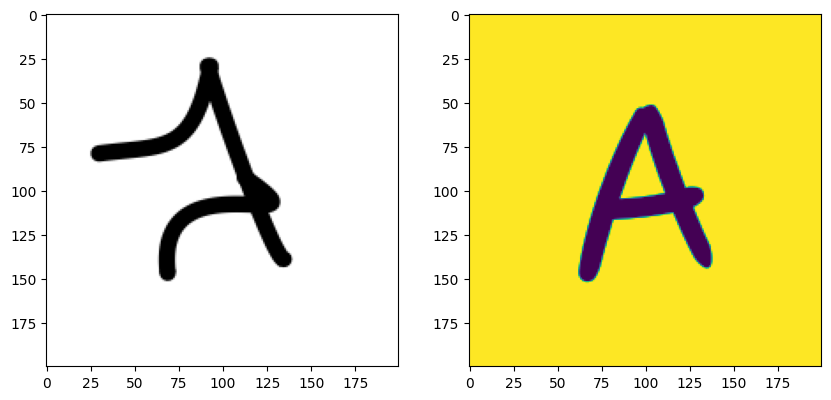

In [133]:
import json
from scipy.optimize import minimize, LinearConstraint, Bounds
import matplotlib.pyplot as plt

alphabets = json.load(open("./src/static/alphabets.json"))

A = alphabets["A"]



myFont = ImageFont.truetype('./src/NanumPenScript-Regular.ttf', font_size)
myMessage = 'A'

reference_A = myImage = create_image((image_size, image_size), 'white', myMessage, myFont, 'black')
reference_A = np.array(reference_A.convert('L'))
reference_A = reference_A / 255

def objective(params):
    generated_A = draw_extended(params)
    difference = np.sum(np.abs(generated_A - reference_A))
    print(difference)
    return difference

initial_params = extended_A

initial_img = draw_extended(initial_params)

constraint_matrix = np.ones((1, 24))  # Sum of all elements
upper_bound = np.array([1.0])  # Sum constraint
lower_bound = np.array([0])  # Sum constraint

bounds = Bounds(lower_bound, upper_bound)

# Create a LinearConstraint object
linear_constraint = LinearConstraint(constraint_matrix, lb=upper_bound, ub=upper_bound)

# Perform optimization to adjust the Bézier curve parameters
optimized_params = minimize(objective, initial_params, method='nelder-mead').x

final_A = draw_extended(optimized_params) * 255


# real_diff = np.sum(np.abs(final_A - initial_img))
# print(real_diff)

image = Image.fromarray(final_A)

# show two images side by side
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(reference_A)
# plt.imshow(image)
# plt.imshow(reference_A * 255)



We need stroke fitting algorithm!

https://dl.acm.org/doi/abs/10.1145/3450626.3459777


In [22]:
from PIL import Image, ImageDraw, ImageFont


def create_image(size, bgColor, message, font, fontColor):
    W, H = size
    image = Image.new('RGB', size, bgColor)
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), message, font=font)
    draw.text(((W-w)/2, 0), message, font=font, fill=fontColor)
    return image

image_size = 200
font_size = int(image_size * 0.9)

myFont = ImageFont.truetype('./src/NanumPenScript-Regular.ttf', font_size)
myMessage = 'A'
myImage = create_image((image_size, image_size), 'white', myMessage, myFont, 'black')
# myImage.save('hello_world.png', "PNG")
myImage.show()

In [76]:
import numpy as np
from scipy.optimize import minimize

# Define a quadratic function to minimize
def quadratic_function(x):
    return (x[0] - 2) ** 2 + (x[1] - 3) ** 2

# Initial guess
initial_guess = np.array([20, 0])

# Perform the optimization using Nelder-Mead method
result = minimize(quadratic_function, initial_guess, method='nelder-mead')

# Extract the optimized solution
optimized_solution = result.x

# Print the result
print("Optimized Solution:", optimized_solution)


Optimized Solution: [1.9999575  2.99999545]
